In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load and reading dataset

In [111]:
df = pd.read_csv("Bakery.csv")

In [112]:
df.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [114]:
df.TransactionNo.notna().sum()

20507

In [115]:
df.TransactionNo.nunique()

9465

In [116]:
print(df.DateTime.head(1))
print(df.DateTime.tail(1))


0    2016-10-30 09:58:11
Name: DateTime, dtype: object
20506    2017-09-04 15:04:24
Name: DateTime, dtype: object


## This dataset provides transaction details of every item purchased between 2016 to 2017 from a bakery

1. There are 20507 total transactions
2. There are 9465 uniques transactions
3. No missing value were found

# Data exploration:

## Most selled products:

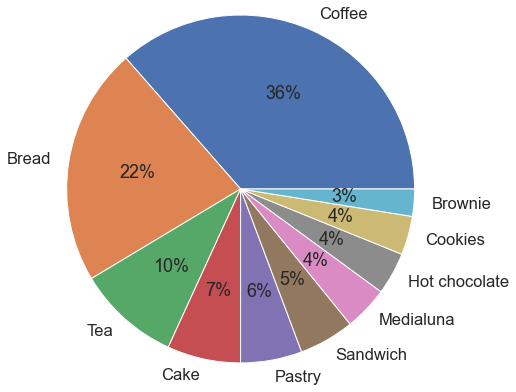

In [159]:
most_selled_list = df["Items"].value_counts().to_frame().reset_index()[:10]
most_selled_list.rename(columns = {"index" : "Product", "Items" : "Quantity"}, inplace = True)
labels = most_selled_list.Product.to_list()
plt.pie(most_selled_list["Quantity"], labels = labels, autopct='%.0f%%', radius =  2)
plt.show()

### Most seleed product is coffe, 36% of sales. Followed by bread with 22%, and in last place of top 3 most selled product, is tea with 10%.

## So, +50%  the bakery income, is from selling coffe and bread.

### When the mayority of sells are done:

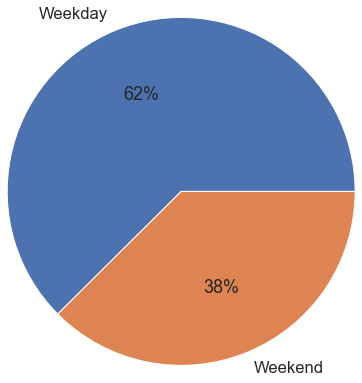

In [118]:
days = df["DayType"].value_counts().to_frame().reset_index()[:10]
days.rename(columns = {"index" : "DayType", "DayType" : "Quantity"}, inplace = True)
labels = days.DayType.to_list()
plt.pie(days["Quantity"], labels = labels, autopct='%.0f%%', radius =  2)
plt.show()

In [119]:
# Que dia y que horas se vende mas cafe
# Que mas se vende junto con el cafe
# Que es lo que mas se vende en la semana y en los findes de semana
# En que momento del dia se hacen mas ventas
# Las ventas son siempre mixtas o son de un solo producto
# Se venden mas cosas azucaradas que sin azucar

## At wich days and hours is coffe most selled:

In [120]:
only_coffee = df.copy()
only_coffee = only_coffee[only_coffee["Items"] == "Coffee"]
only_coffee


,TransactionNo,Items,DateTime,Daypart,DayType
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend
15,7,Coffee,2016-10-30 10:19:12,Morning,Weekend
27,12,Coffee,2016-10-30 10:30:14,Morning,Weekend
33,13,Coffee,2016-10-30 10:31:24,Morning,Weekend
41,16,Coffee,2016-10-30 10:37:08,Morning,Weekend
...,...,...,...,...,...
20483,9673,Coffee,2017-09-04 12:32:03,Afternoon,Weekend
20485,9674,Coffee,2017-09-04 13:04:08,Afternoon,Weekend
20490,9678,Coffee,2017-09-04 13:49:21,Afternoon,Weekend
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend


<AxesSubplot:xlabel='Hour', ylabel='Coffee_sold'>

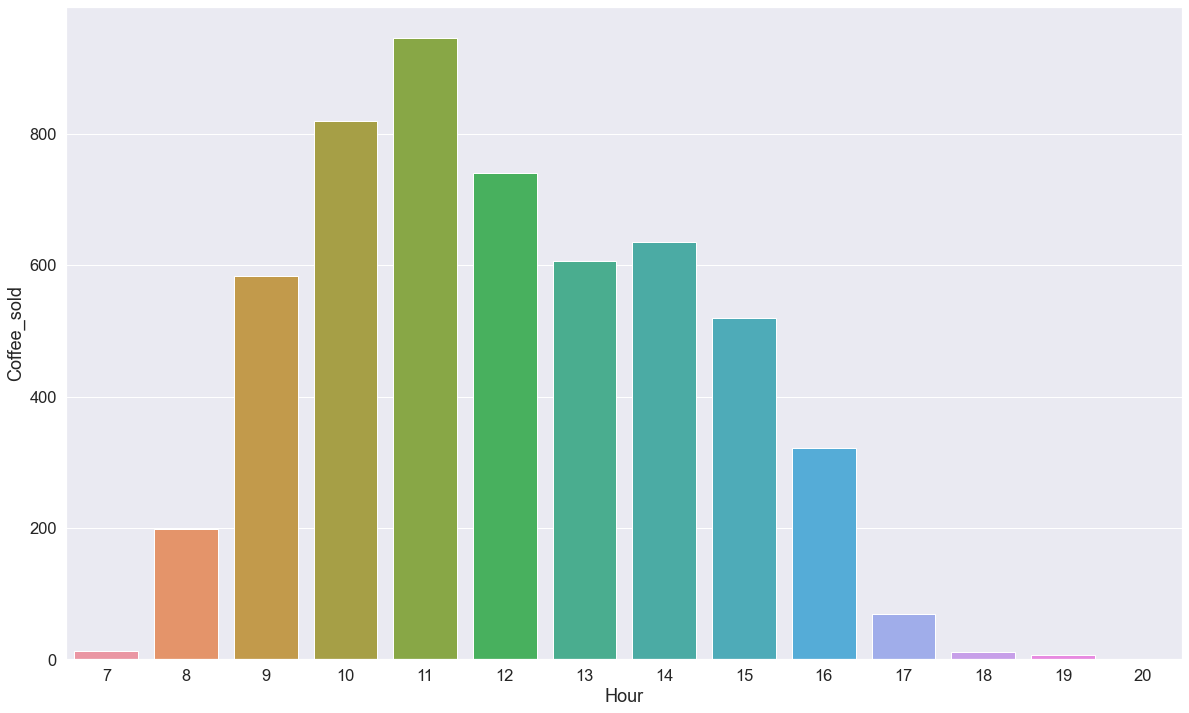

In [121]:
coffee_sold = only_coffee.copy()
coffee_sold["DateTime"] = pd.to_datetime(coffee_sold["DateTime"])

coffee_sold_per_hour = coffee_sold.groupby(coffee_sold['DateTime'].dt.hour)["Items"].count().to_frame().reset_index()
coffee_sold_per_hour.rename(columns = {"DateTime" : "Hour", "Items" : "Coffee_sold"}, inplace = True)
#print(coffee_sold_per_hour)
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.5)
sns.barplot(x = "Hour", y = "Coffee_sold" , data = coffee_sold_per_hour)

## Between 10 and 12 am, coffee is most selled.

# Lets check, at wich days, peopel drink more coffee:

<AxesSubplot:xlabel='WeekDay', ylabel='Total_coffee_sold'>

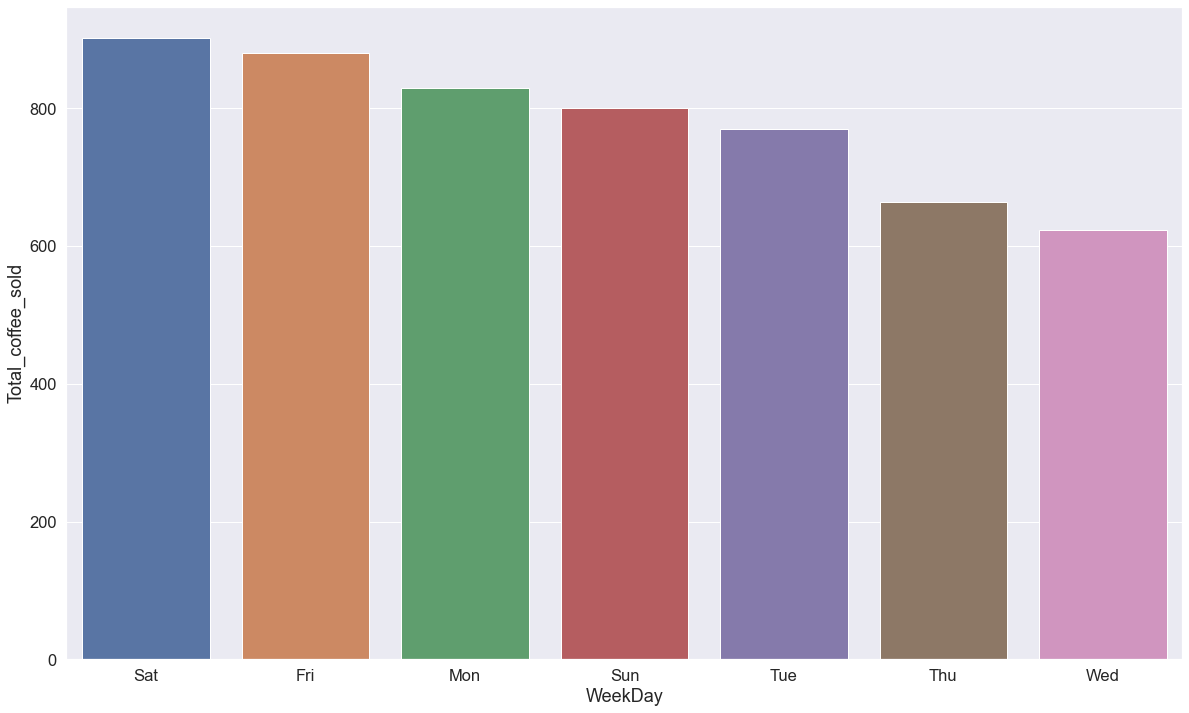

In [122]:
coffe_per_day = only_coffee.copy()

coffe_per_day['day_of_week']= pd.to_datetime(coffe_per_day['DateTime']).dt.dayofweek
coffe_per_day['day_of_week'].replace({0: "Mon", 1: "Tue",
                          2: "Wed",3: "Thu",
                          4: "Fri",5: "Sat",
                          6: "Sun"}, inplace = True)


coffee_sold_per_day = coffe_per_day.groupby('day_of_week')["Items"].count().sort_values(ascending = False).to_frame().reset_index()
coffee_sold_per_day.rename(columns = {"day_of_week" : "WeekDay", "Items" : "Total_coffee_sold"}, inplace = True)
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.5)
sns.barplot(x = "WeekDay", y = "Total_coffee_sold" , data = coffee_sold_per_day)

## Saturdays and fridays are the most productive days,  

# Coffee sold per hour, each day of de week:

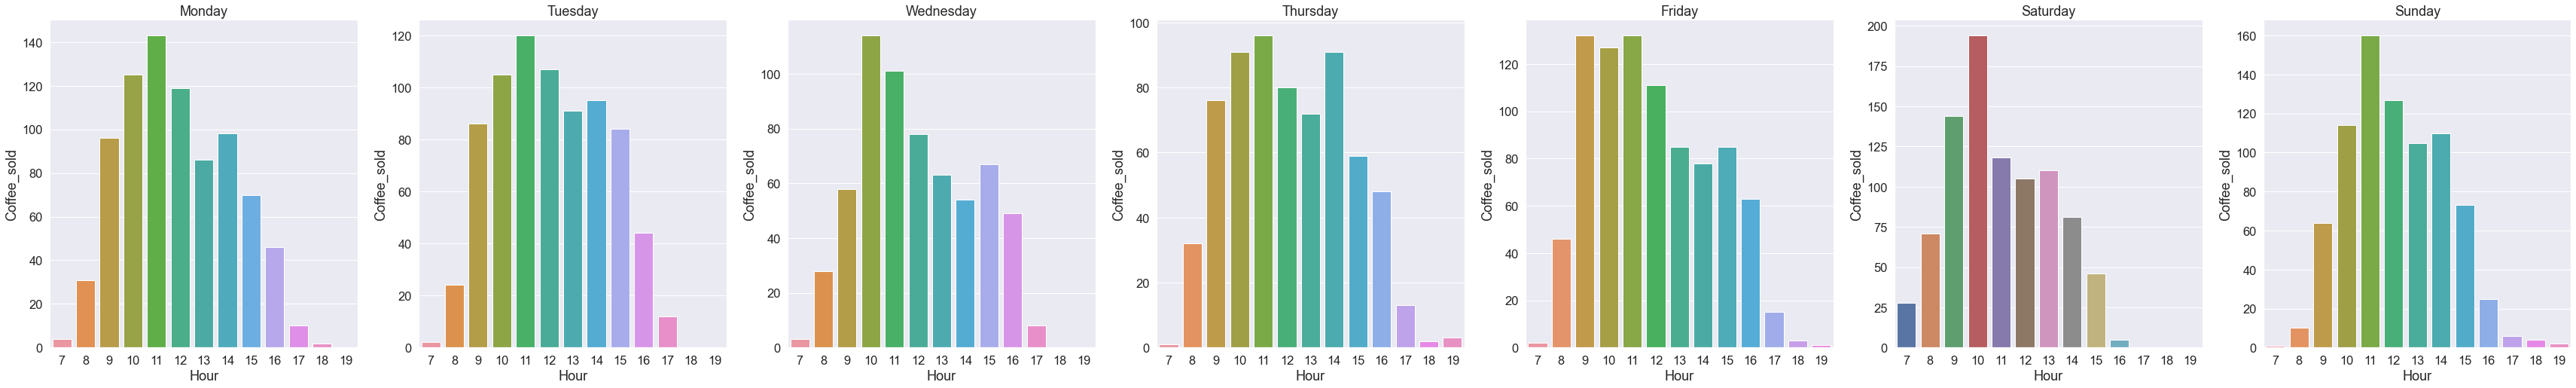

In [123]:
day_hour_coffee_sold = coffe_per_day.copy()

day_hour_coffee_sold["DateTime"] = pd.to_datetime(day_hour_coffee_sold["DateTime"])


day_hour_coffee_sold_mon = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Mon"]
day_hour_coffee_sold_tue = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Tue"]
day_hour_coffee_sold_wen = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Wed"]
day_hour_coffee_sold_thu = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Thu"]
day_hour_coffee_sold_fri = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Fri"]
day_hour_coffee_sold_sat = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Sat"]
day_hour_coffee_sold_sun = day_hour_coffee_sold[day_hour_coffee_sold['day_of_week'] == "Sun"]

df_day_list = [day_hour_coffee_sold_mon, day_hour_coffee_sold_tue, day_hour_coffee_sold_wen,
              day_hour_coffee_sold_thu, day_hour_coffee_sold_fri, day_hour_coffee_sold_sat,
              day_hour_coffee_sold_sun]

day_list= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


fig, axes = plt.subplots(1,7, sharex=True, figsize=(60,8))
axes_count = 0

for day_hour_coffee_sold in df_day_list:
    df_grouped = day_hour_coffee_sold.groupby(day_hour_coffee_sold['DateTime'].dt.hour)["day_of_week"].count().reset_index()
    df_grouped.rename(columns = {"DateTime" : "Hour", "day_of_week" : "Coffee_sold"}, inplace = True)
    sns.barplot(ax = axes[axes_count], x = df_grouped.Hour, y = df_grouped.Coffee_sold)
    axes[axes_count].set_title(day_list[axes_count])
    axes_count += 1

# Que mas se vende junto con el cafe:

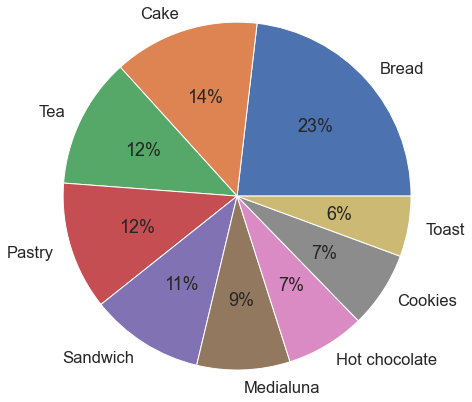

In [156]:
product_with_coffee = df.copy()

transactions_with_coffee = only_coffee['TransactionNo'].to_list()

product_with_coffee = product_with_coffee[product_with_coffee['TransactionNo'].isin(transactions_with_coffee)]
product_with_coffee
transactions_with_coffee = product_with_coffee.groupby('TransactionNo').count()
transactions_with_coffee.drop(columns = ['DateTime', 'Daypart', 'DayType'], inplace = True)
transactions_with_coffee
not_only_coffee_transactions = transactions_with_coffee[transactions_with_coffee['Items'] != 1]
not_only_coffee_transactions_index = not_only_coffee_transactions.index.to_list()
not_only_coffee_transactions_index

product_with_coffee = product_with_coffee[product_with_coffee['TransactionNo'].isin(not_only_coffee_transactions_index)].reset_index()
product_with_coffee = product_with_coffee.drop(columns = ['index', 'DateTime', 'Daypart', 'DayType'])

count = product_with_coffee.groupby('Items').count().sort_values(by = 'TransactionNo', ascending=False)[:10].reset_index()
count.rename(columns = {'TransactionNo' : 'Quantity'}, inplace = True)
count = count.iloc[1:]
labels = count.Items.to_list()
plt.pie(count["Quantity"], labels = labels, autopct='%.0f%%', radius =  2)
plt.show()

### The products most sold with coffee, are: Bread, Cake, Tea and Pastry

# Cuando se vende mas en la semana y en el fin de semana:

     Daypart  DayType  Quantity
0  Afternoon  Weekday      7273
1  Afternoon  Weekend      4296
2    Evening  Weekday       356
3    Evening  Weekend       164
4    Morning  Weekday      5174
5    Morning  Weekend      3230
6      Night  Weekend        10
7      Night  Weekday         4


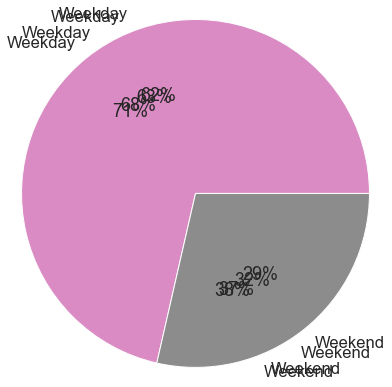

In [260]:
daytype_count = df.copy()
daytype_count = daytype_count.drop(columns = ['TransactionNo', 'Items', 'DateTime'])
daytype_count = daytype_count.groupby('Daypart')['DayType'].value_counts().to_frame()
daytype_count.rename(columns = {"DayType":"Quantity"}, inplace = True)
daytype_count.reset_index(inplace = True)
#daytype_count.sort_values(by = 'DayType', inplace = True)
print(daytype_count)
#plt.figure(figsize=(15,10))
#sns.set(font_scale = 1.5)
#sns.barplot(data = daytype_count, x = 'Daypart', y = 'Quantity', hue = 'DayType')

test = daytype_count.copy()

#test = test[test['Daypart'] == 'Afternoon']
#n = 0
#print(daytype_count[n : n+2])
#n = 2
#print(daytype_count[n : n+2])
#n = 4
#print(daytype_count[n : n+2])
#n = 6
#print(daytype_count[n : n+2])


fig, axes = plt.subplots(2,2, sharex=True, figsize=(60,8))
axes_count = 0
#labels = ['Weekday', 'Weekend']
for n in [0,2,4,6]:
    test = daytype_count[n : n+2]
    plt.pie(test["Quantity"], labels = labels, autopct='%.0f%%', radius =  2)
#    axes_count += 1